In [1]:
# Install latest version from GitHub
!pip install -q -U git+https://github.com/jdvelasq/techminer

# Autocorrelation matrix (Experimental)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from techminer import DataFrame, Plot, heatmap

#
# Data loading
#
df = DataFrame(
    pd.read_json(
        "https://raw.githubusercontent.com/jdvelasq/techminer/master/data/tutorial/"
        + "cleaned-data.json",
        orient="records",
        lines=True,
    )
)

#
# Columns of the dataframe
#
df.columns

Index(['Authors', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by',
       'DOI', 'Affiliations', 'Document Type', 'Access Type', 'Source', 'EID',
       'Abstract', 'Author Keywords', 'Index Keywords', 'References',
       'keywords', 'CONF', 'fingerprint', 'keywords_cleaned', 'ID',
       'top_10_Authors_freq', 'top_10_keywords_freq',
       'top_10_Source_title_freq', 'top_10_Authors_cited_by',
       'top_10_keywords_cited_by', 'top_10_Source_title_cited_by'],
      dtype='object')

## Authors

In [3]:
#
# Top 10 most frequent authors
#
top_authors = df.documents_by_term('Authors').head(10).Authors
top_authors

0       Arevalo A.
1       Gabbouj M.
2     Hernandez G.
3     Hussain A.J.
4     Iosifidis A.
5    Kanniainen J.
6          Leon D.
7          Nino J.
8      Passalis N.
9      Sandoval J.
Name: Authors, dtype: object

In [4]:
matrix = df.autocorr(column="Authors", as_matrix=True)
matrix = matrix.loc[top_authors,top_authors]
matrix

,Arevalo A.,Gabbouj M.,Hernandez G.,Hussain A.J.,Iosifidis A.,Kanniainen J.,Leon D.,Nino J.,Passalis N.,Sandoval J.
Arevalo A.,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
Gabbouj M.,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
Hernandez G.,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
Hussain A.J.,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Iosifidis A.,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
Kanniainen J.,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
Leon D.,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
Nino J.,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
Passalis N.,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
Sandoval J.,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0


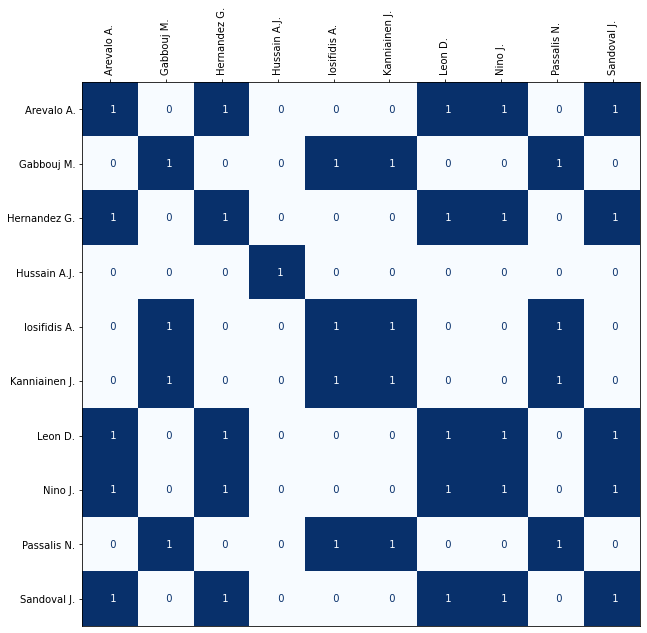

In [5]:
plt.figure(figsize=(10, 10))
Plot(matrix).heatmap(cmap='Blues')

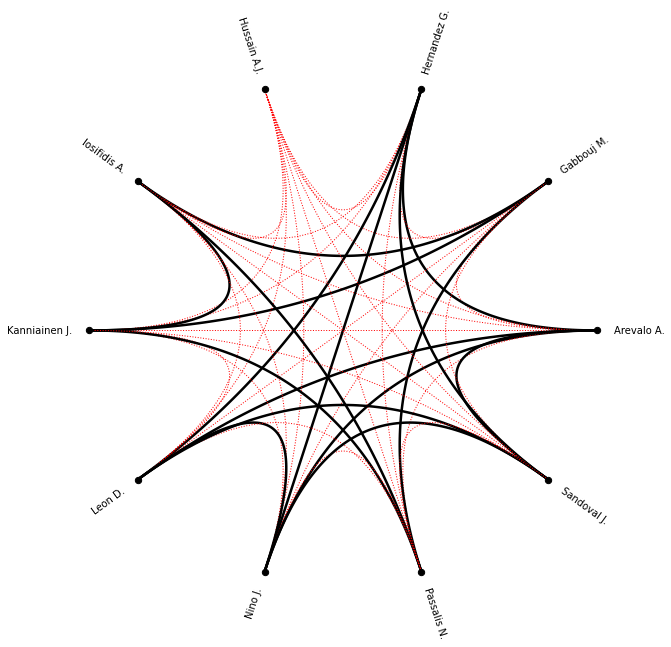

In [6]:
plt.figure(figsize=(10, 10))
Plot(matrix).chord_diagram()